In [1]:
#Store the Data
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/" # central location for all data
HOUSING_URL = DOWNLOAD_ROOT + "tree/master/datasets/housing/housing.csv"#url from which data(housing.csv) to be dowloaded
HOUSING_PATH=os.path.join('datasets','housing')  #path is created for no. of directories

def fetch_housing_data(housing_url= HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True) # Creates directory datasets and housing inside it
    csv_path = os.path.join(housing_path, "housing.csv")  # path is created for storing file under ' housing.csv' name
    urllib.request.urlretrieve(housing_url, csv_path) # dowloads data from 'housing_url' and saves in 'csv_path' under name mentioned in 'csv_path'



In [2]:
#fetch_housing_data()

In [3]:
#Load Data

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [4]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [6]:
housing.ocean_proximity.value_counts() # Different categories in the feature

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe() #Summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


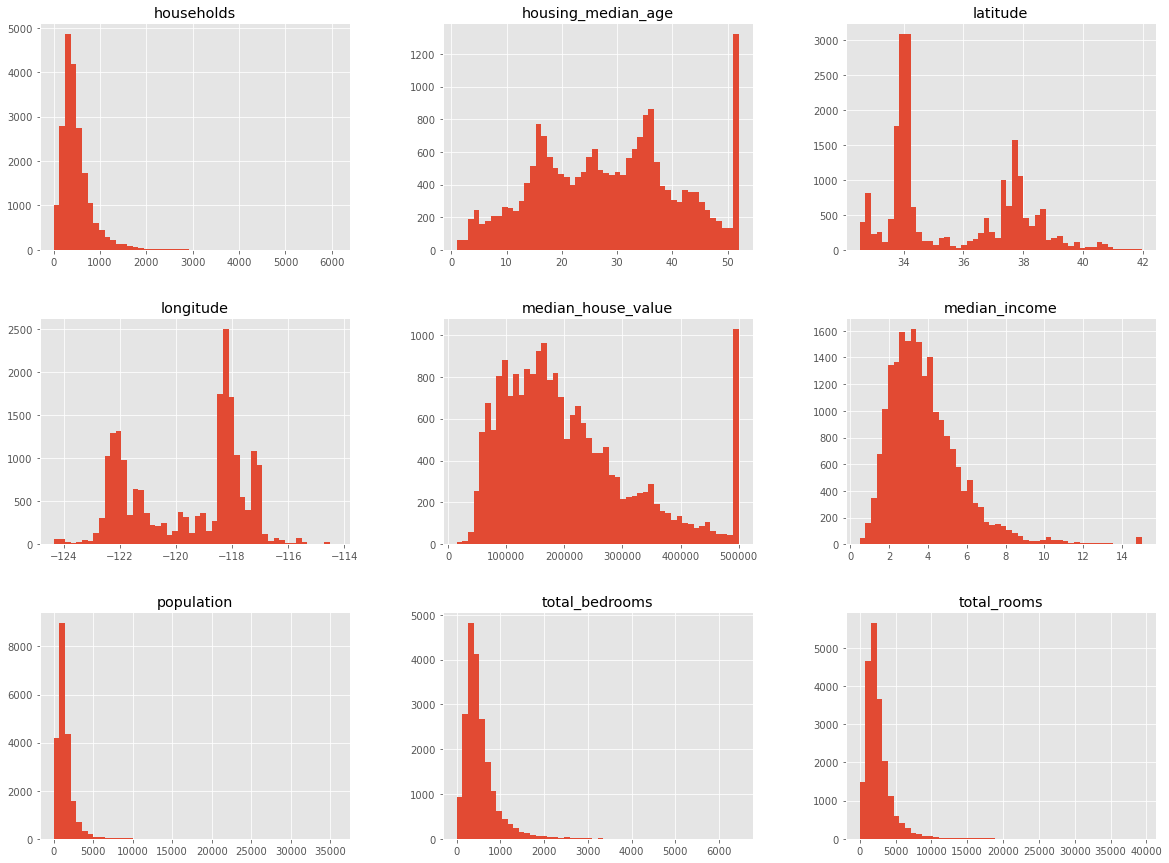

In [8]:
#Visualizing data
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
housing.hist(bins=50, figsize=(20,15)) #plt data for all numerical features
plt.show()

In [9]:
#Creating Test Set

import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio*len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [10]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)

Suppose you are told that median_Income is a critical feature for predicting housing data. Now you may
want to ensure that test set is representative of various categories of incomes. Therofore you need to 
create a categorical variable and create test data such that it contains all categaories uniformly.

In [13]:
#based on median_income new categorical variable is introduced
housing['income_cat'] = pd.cut(housing.median_income, bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

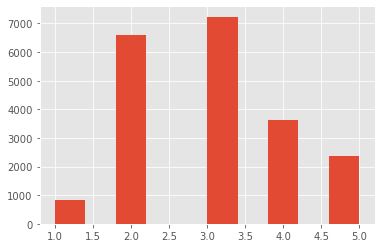

In [14]:
housing.income_cat.hist()

In [15]:
#Stratified Sampling based on income_cat
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42) #Assigning values for data splitting
for train_index, test_index in split.split(housing,housing['income_cat']):#split.split() splits the housing data based on income_cat
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
#Test created has uniform spread od data from all income_cat
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
#Remove income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [18]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## Discover and Visualize the Data

In [19]:
housing=strat_train_set.copy()

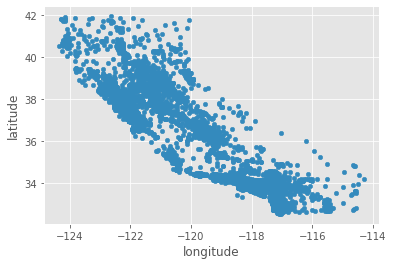

In [20]:
housing.plot(kind='scatter', x='longitude',y='latitude')

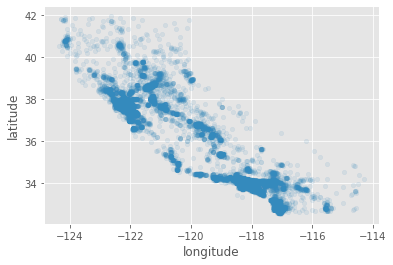

In [21]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1) #shows location of high density data points

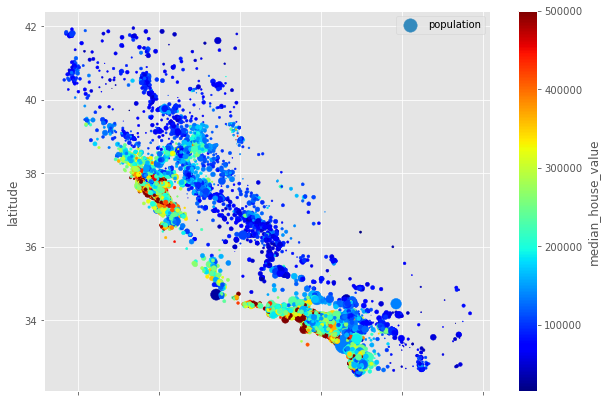

In [22]:
#To visualize better
#circle radius: population (s)
#color: median house value (c)
housing.plot(kind='scatter',x='longitude',y='latitude',s=housing.population/100,c='median_house_value',
             cmap=plt.get_cmap('jet'),figsize=(10,7),colorbar=True,label='population')
plt.legend()

In [23]:
#Looking for correlations
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False) #how feartures are corelated to o/p value


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

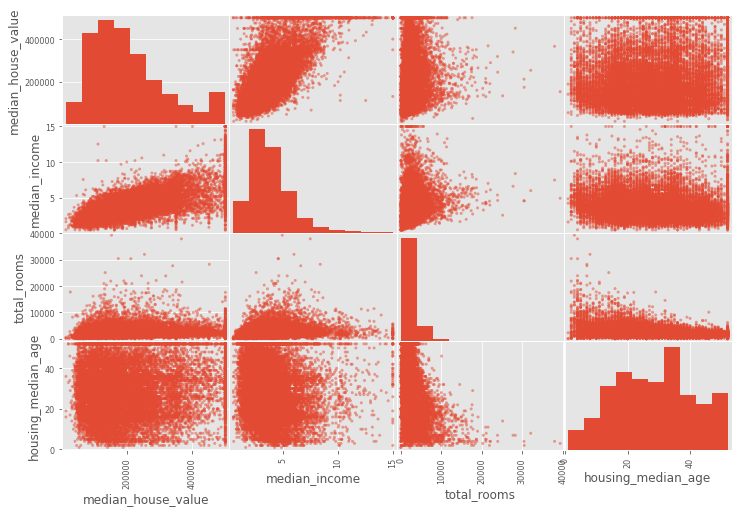

In [24]:
#Another way to check correlation is by using scatter matrix
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()
#from plot it can be seen that the most promisiing attribute is median_income 

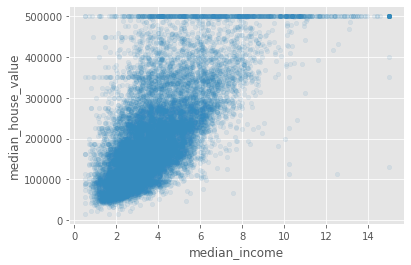

In [25]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [26]:
#Lastly you should try out various attribute combinations
housing['rooms_per_household'] = housing.total_rooms/housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms/housing.total_rooms
housing['population_per_household'] = housing.population/housing.households

In [27]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# It can be seen that bedrooms/room is much more corelated than total rooms or bedrooms 

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning

In [28]:
#Separate predictors and labels

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
# Data cleaning for missing values
# 3 options to deal with missing value
housing.dropna(subset=['total_bedrooms']) # get rid of corresponding district
housing.drop('total_bedrooms',axis=1) # get rid of the whole attribiute
median= housing.total_bedrooms.median()
housing.total_bedrooms.fillna(median, inplace=True) # replace NA value with median value

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [31]:
#With Scikit learn you can easily take care of missing values

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='median') # an instance is created specifying you want replace missing values with median

# Since median can only be computed on numerical attributes you need to create a copy without text attribute

housing_num = housing.drop('ocean_proximity',axis=1)

#fit the imputer to the training data using fit() method

imputer.fit(housing_num) #compute mean of each attibute in housing_num and save it in statistic_ instance

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
#Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any
#missing values in new data after the system goes live, so it is safer to apply
#the imputer to all the numerical attributes:

X=imputer.transform(housing_num) # replace all the missing values with corresponding median values
# the result is plain numpy array 

#To put it back to Dataframe

housing_tr=pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)

In [35]:
#handling Categorical Variables

In [36]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat=housing[['ocean_proximity']]
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [37]:
ordinal_encoder.categories_ #List of categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
# Above solution is useful of ordered categories but not for unordered
# To fix this common solution is creating binary matrix and called one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # O/p is scipy sparse matrix with 16512x5


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
housing_cat_1hot.toarray() # converted to numpy array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [40]:
#For large no. of categories one-hot encoding slows the training process
#If this happens, youmay want to replace the categorical input with useful numerical features related to the
#categories


# Custom Transformation Pending

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [42]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [43]:
#Feature Scaling
#StandardScaler is used for standardization scaling

In [44]:
#Tranformation Pipelines
#Sklearn provides pipeline class to exectue transformation to data in right order

In [45]:
#Piplines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# the pipline constructor takes the list of name/estimator pairs defining sequence of steps
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())])
housing_num_tr= num_pipeline.fit_transform(housing_num)  # pipline applied only on numeric atributes
# num_pipeline returns numpy array

In [46]:
#So far, we have handled the categorical columns and the numerical columns separately. It would be more 
#convenient to have a single transformer able tohandle all columns, applying the appropriate 
#transformations to each column

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs= ['ocean_proximity']

#The constructor requires a list of tuples, where each tuple contains a name, a transformer, and a list 
#of names (or indices) of columns that the transformer should be applied to.

full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),
                                  ('cat',OneHotEncoder(),cat_attribs)])

housing_prepared= full_pipeline.fit_transform(housing)

In [47]:
housing_prepared.shape

(16512, 16)

## Select and Train a Model

In [48]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_reg_rmse_scores =np.sqrt(-scores)

In [50]:
lin_reg_rmse_scores.mean()

69051.44341419876

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [52]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores =np.sqrt(-forest_scores)
print(forest_rmse_scores.mean())

50182.303100336096


## Fine Tuning the Model

In [61]:
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor(random_state=42)

param_grid = [ 
                {'n_estimators' : [3,10,30] , 
                 'max_features' : [2,4,6,8] }                
            ]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
#The Best Hyperparameter Combination 

In [63]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
# Score of each hyperparameter combination tested during the grid search:

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}


In [70]:
final_model = grid_search.best_estimator_

X_test =  strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_pred= final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927